Loading the Dataset and Loading All The Libraries

In [ ]:
import pandas as pd
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
import wordcloud
from scipy.stats import zscore


# Read the CSV file into a pandas DataFrame
df = pd.read_csv("/content/disney_plus_shows.csv")


# Display the loaded data
display(df)

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,"November 12, 2019",97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.0,7.3,"283,945"
1,tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,NaN,2018–,25 Mar 2019,"February 28, 2020",NaN,"Animation, Comedy, Family",NaN,NaN,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",NaN,NaN,6.2,124
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,"November 12, 2019",103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,5.7,"97,785"
3,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,"November 12, 2019",74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,NaN,5.8,"7,434"
4,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,"November 12, 2019",100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.0,4.9,"33,444"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,tt3544734,Zapped,"When Zoey's mom remarries, Zoey finds it hard ...",movie,TV-G,2014,23 Jun 2014,"November 12, 2019",102 min,"Comedy, Family, Fantasy",Peter DeLuise,"Leslie Margolis (based on the novel ""Boys Are ...","Zendaya, Chanelle Peloso, Spencer Boldman, Emi...",English,"Canada, USA",5 wins & 1 nomination.,NaN,5.1,"3,750"
988,tt0186726,Zenon: Girl of the 21st Century,An inquisitive teenager pries into suspected d...,movie,TV-G,1999,23 Jan 1999,"November 12, 2019",97 min,"Adventure, Comedy, Family, Sci-Fi",Kenneth Johnson,"Marilyn Sadler (book), Roger Bollen (book), St...","Kirsten Storms, Raven-Symoné, Stuart Pankin, H...",English,USA,2 nominations.,NaN,6.4,"6,378"
989,tt0271271,Zenon: The Zequel,A mischievous fifteen-year-old girl living on ...,movie,TV-G,2001,12 Jan 2001,"November 12, 2019",100 min,"Comedy, Family, Adventure, Sci-Fi",Manny Coto,"Marilyn Sadler (book), Roger Bollen (book), St...","Kirsten Storms, Shadia Simmons, Lauren Maltby,...",English,"USA, New Zealand",1 nomination.,NaN,5.9,"3,318"
990,tt0379060,Zenon: Z3,The heroine sets out to win an important compe...,movie,TV-G,2004,11 Jun 2004,"November 12, 2019",81 min,"Adventure, Comedy, Family, Sci-Fi",Steve Rash,"Marilyn Sadler (character from the book ""Zenon...","Kirsten Storms, Lauren Maltby, Alyson Morgan, ...",English,USA,NaN,NaN,5.5,"2,339"


Checking the Info of the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdb_id      894 non-null    object 
 1   title        894 non-null    object 
 2   plot         866 non-null    object 
 3   type         894 non-null    object 
 4   rated        742 non-null    object 
 5   year         894 non-null    object 
 6   released_at  874 non-null    object 
 7   added_at     992 non-null    object 
 8   runtime      838 non-null    object 
 9   genre        885 non-null    object 
 10  director     689 non-null    object 
 11  writer       743 non-null    object 
 12  actors       870 non-null    object 
 13  language     865 non-null    object 
 14  country      869 non-null    object 
 15  awards       556 non-null    object 
 16  metascore    292 non-null    float64
 17  imdb_rating  879 non-null    float64
 18  imdb_votes   879 non-null    object 
dtypes: float

Checking the Number of Numerical and Categorical Features

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(exclude=['object']).columns

num_categorical_features = len(categorical_features)
num_numerical_features = len(numerical_features)

print("Number of categorical features:", num_categorical_features)
print("Number of numerical features:", num_numerical_features)

Number of categorical features: 17
Number of numerical features: 2


Checking Missing Values

In [ ]:
missing_values = df.isnull().sum()

print("Variables with missing values:")
print(missing_values[missing_values > 0])

Variables with missing values:
imdb_id         98
title           98
plot           126
type            98
rated          250
year            98
released_at    118
runtime        154
genre          107
director       303
writer         249
actors         122
language       127
country        123
awards         436
metascore      700
imdb_rating    113
imdb_votes     113
dtype: int64


Resolving the Missing Values of metascore and imdb_rating (Numerical Features)

In [ ]:
# Fill missing values in numerical variables
df['metascore'] = df['metascore'].fillna(df['metascore'].mean())
df['imdb_rating'] = df['imdb_rating'].fillna(df['imdb_rating'].median())

Resolving the Missing Values of Categorical Features

In [ ]:
categorical_variables = ['title', 'plot', 'type', 'rated', 'released_at', 'genre', 'director', 'writer', 'actors', 'language', 'country', 'awards','imdb_id','year','runtime','imdb_votes']

for var in categorical_variables:
    df[var] = df[var].fillna(df[var].mode().iloc[0])

Checking for Missing Values after filling them

In [ ]:
missing_values = df.isnull().sum()

print("Variables with missing values:")
print(missing_values[missing_values > 0])

Variables with missing values:
Series([], dtype: int64)


In [ ]:
display(df)

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,"November 12, 2019",97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.000000,7.3,"283,945"
1,tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,G,2018–,25 Mar 2019,"February 28, 2020",30 min,"Animation, Comedy, Family",Jack Hannah,"Bill Berg (story), Nick George (story)","Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",1 nomination.,62.061644,6.2,124
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,"November 12, 2019",103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.000000,5.7,"97,785"
3,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,"November 12, 2019",74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,62.061644,5.8,"7,434"
4,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,"November 12, 2019",100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.000000,4.9,"33,444"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,tt3544734,Zapped,"When Zoey's mom remarries, Zoey finds it hard ...",movie,TV-G,2014,23 Jun 2014,"November 12, 2019",102 min,"Comedy, Family, Fantasy",Peter DeLuise,"Leslie Margolis (based on the novel ""Boys Are ...","Zendaya, Chanelle Peloso, Spencer Boldman, Emi...",English,"Canada, USA",5 wins & 1 nomination.,62.061644,5.1,"3,750"
988,tt0186726,Zenon: Girl of the 21st Century,An inquisitive teenager pries into suspected d...,movie,TV-G,1999,23 Jan 1999,"November 12, 2019",97 min,"Adventure, Comedy, Family, Sci-Fi",Kenneth Johnson,"Marilyn Sadler (book), Roger Bollen (book), St...","Kirsten Storms, Raven-Symoné, Stuart Pankin, H...",English,USA,2 nominations.,62.061644,6.4,"6,378"
989,tt0271271,Zenon: The Zequel,A mischievous fifteen-year-old girl living on ...,movie,TV-G,2001,12 Jan 2001,"November 12, 2019",100 min,"Comedy, Family, Adventure, Sci-Fi",Manny Coto,"Marilyn Sadler (book), Roger Bollen (book), St...","Kirsten Storms, Shadia Simmons, Lauren Maltby,...",English,"USA, New Zealand",1 nomination.,62.061644,5.9,"3,318"
990,tt0379060,Zenon: Z3,The heroine sets out to win an important compe...,movie,TV-G,2004,11 Jun 2004,"November 12, 2019",81 min,"Adventure, Comedy, Family, Sci-Fi",Steve Rash,"Marilyn Sadler (character from the book ""Zenon...","Kirsten Storms, Lauren Maltby, Alyson Morgan, ...",English,USA,1 nomination.,62.061644,5.5,"2,339"


Checking for Duplicate Entries

In [ ]:
# Check for duplicate entries
duplicates = df.duplicated()

# Print the duplicate entries
if duplicates.any():
    print("Duplicate entries found:")
    print(df[duplicates])
else:
    print("No duplicate entries found.")

Duplicate entries found:
       imdb_id          title  \
64   tt0019422  Freaky Friday   
66   tt0019422  Freaky Friday   
73   tt0019422  Freaky Friday   
82   tt0019422  Freaky Friday   
88   tt0019422  Freaky Friday   
..         ...            ...   
935  tt0019422  Freaky Friday   
948  tt0019422  Freaky Friday   
965  tt0019422  Freaky Friday   
966  tt0019422  Freaky Friday   
980  tt0019422  Freaky Friday   

                                                  plot   type rated  year  \
64   The romantic tale of a sheltered uptown Cocker...  movie     G  2019   
66   The romantic tale of a sheltered uptown Cocker...  movie     G  2019   
73   The romantic tale of a sheltered uptown Cocker...  movie     G  2019   
82   The romantic tale of a sheltered uptown Cocker...  movie     G  2019   
88   The romantic tale of a sheltered uptown Cocker...  movie     G  2019   
..                                                 ...    ...   ...   ...   
935  The romantic tale of a sheltered u

Drop the Duplicate Entries

In [ ]:
df = df.drop_duplicates()

Viewing the Dataset after Dropping the Duplicates

In [ ]:
display(df)

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,"November 12, 2019",97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.000000,7.3,"283,945"
1,tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,G,2018–,25 Mar 2019,"February 28, 2020",30 min,"Animation, Comedy, Family",Jack Hannah,"Bill Berg (story), Nick George (story)","Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",1 nomination.,62.061644,6.2,124
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,"November 12, 2019",103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.000000,5.7,"97,785"
3,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,"November 12, 2019",74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,62.061644,5.8,"7,434"
4,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,"November 12, 2019",100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.000000,4.9,"33,444"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,tt3544734,Zapped,"When Zoey's mom remarries, Zoey finds it hard ...",movie,TV-G,2014,23 Jun 2014,"November 12, 2019",102 min,"Comedy, Family, Fantasy",Peter DeLuise,"Leslie Margolis (based on the novel ""Boys Are ...","Zendaya, Chanelle Peloso, Spencer Boldman, Emi...",English,"Canada, USA",5 wins & 1 nomination.,62.061644,5.1,"3,750"
988,tt0186726,Zenon: Girl of the 21st Century,An inquisitive teenager pries into suspected d...,movie,TV-G,1999,23 Jan 1999,"November 12, 2019",97 min,"Adventure, Comedy, Family, Sci-Fi",Kenneth Johnson,"Marilyn Sadler (book), Roger Bollen (book), St...","Kirsten Storms, Raven-Symoné, Stuart Pankin, H...",English,USA,2 nominations.,62.061644,6.4,"6,378"
989,tt0271271,Zenon: The Zequel,A mischievous fifteen-year-old girl living on ...,movie,TV-G,2001,12 Jan 2001,"November 12, 2019",100 min,"Comedy, Family, Adventure, Sci-Fi",Manny Coto,"Marilyn Sadler (book), Roger Bollen (book), St...","Kirsten Storms, Shadia Simmons, Lauren Maltby,...",English,"USA, New Zealand",1 nomination.,62.061644,5.9,"3,318"
990,tt0379060,Zenon: Z3,The heroine sets out to win an important compe...,movie,TV-G,2004,11 Jun 2004,"November 12, 2019",81 min,"Adventure, Comedy, Family, Sci-Fi",Steve Rash,"Marilyn Sadler (character from the book ""Zenon...","Kirsten Storms, Lauren Maltby, Alyson Morgan, ...",English,USA,1 nomination.,62.061644,5.5,"2,339"


Checking for Outliers in the Data Frame

In [ ]:
# Specify the column(s) to check for outliers
columns_to_check = ['metascore', 'imdb_rating']  # Replace with the actual column names

# Define a function to detect outliers using IQR method
def detect_outliers_iqr(data):
    # Calculate the first and third quartile
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = (data < lower_bound) | (data > upper_bound)

    return outliers

# Check for outliers in the specified columns
outliers_df = df[columns_to_check].apply(detect_outliers_iqr)

# Print the rows containing outliers
print("Rows containing outliers:")
print(df[outliers_df.any(axis=1)]) 


Rows containing outliers:
       imdb_id                         title  \
0    tt0147800    10 Things I Hate About You   
2    tt0115433                101 Dalmatians   
4    tt0211181                102 Dalmatians   
6    tt0046672  20,000 Leagues Under the Sea   
7    tt0120623                  A Bug's Life   
..         ...                           ...   
962  tt0096438       Who Framed Roger Rabbit   
967  tt0096446                        Willow   
970  tt1449283               Winnie the Pooh   
978  tt1772341                Wreck-It Ralph   
991  tt2948356                      Zootopia   

                                                  plot   type  rated  year  \
0    A pretty, popular teenager can't go out on a d...  movie  PG-13  1999   
2    An evil high-fashion designer plots to steal D...  movie      G  1996   
4    Cruella DeVil gets out of prison and goes afte...  movie      G  2000   
6    A ship sent to investigate a wave of mysteriou...  movie      G  1954   
7    A 

Ploting the Outliers of IMDB Rating

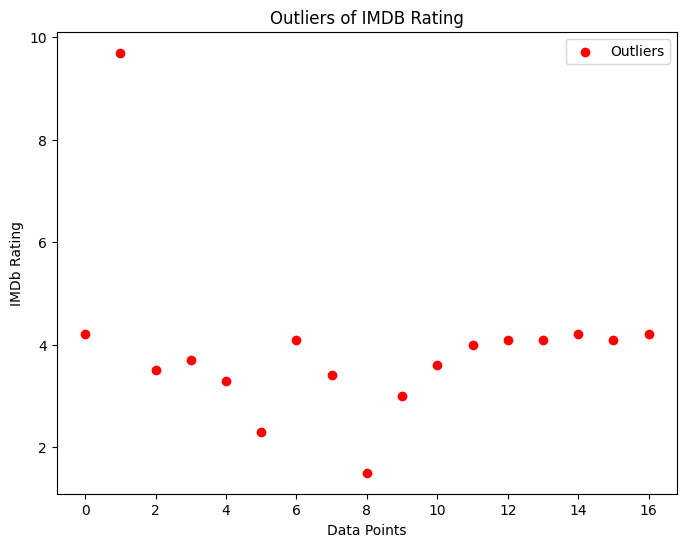

In [ ]:
outliers_imdb_rating = df[outliers_df['imdb_rating']]['imdb_rating']

plt.figure(figsize=(8, 6))
plt.scatter(range(len(outliers_imdb_rating)), outliers_imdb_rating, color='red', label='Outliers')
plt.xlabel('Data Points')
plt.ylabel('IMDb Rating')
plt.title('Outliers of IMDB Rating')
plt.legend()
plt.show()

Ploting the Outliers of Meta Score

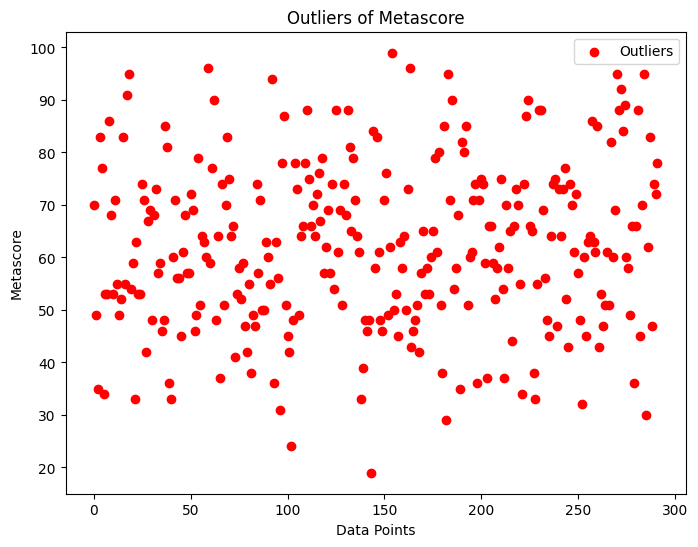

In [ ]:
outliers_metascore = df[outliers_df['metascore']]['metascore']

plt.figure(figsize=(8, 6))
plt.scatter(range(len(outliers_metascore)), outliers_metascore, color='red', label='Outliers')
plt.xlabel('Data Points')
plt.ylabel('Metascore')
plt.title('Outliers of Metascore')
plt.legend()
plt.show()

Applying Log Transformation to Handle the Outliers

In [ ]:
#df_transformed = df
#df_transformed['metascore'] = np.log(df['metascore'])
#df_transformed['imdb_rating'] = np.log(df['imdb_rating'])
from scipy.stats.mstats import winsorize

# Apply winsorization to selected columns
df_winsorized = df.copy()
df_winsorized['metascore'] = winsorize(df['metascore'], limits=[0.05, 0.05])
df_winsorized['imdb_rating'] = winsorize(df['imdb_rating'], limits=[0.05, 0.05])

Saving the Data Frame after cleaning

In [ ]:
df.to_csv('cleaned_dataset_disney.csv', index=False)


Looking for the Descriptive Statistics

In [ ]:
descriptive_stats = df.describe()

print(descriptive_stats)

        metascore  imdb_rating
count  918.000000   918.000000
mean    62.061644     6.658279
std      8.887329     0.998457
min     19.000000     1.500000
25%     62.061644     6.100000
50%     62.061644     6.700000
75%     62.061644     7.300000
max     99.000000     9.700000


The Co-relation Heat Map

<ipython-input-693-04f756ca9f14>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



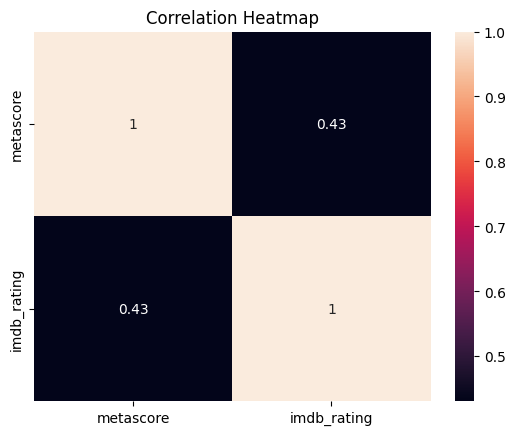

In [ ]:
import seaborn as sns



correlation_matrix = df.corr()

# Create a correlation heatmap
sns.heatmap(correlation_matrix, annot=True)

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

Distribution of IMDB Rating

In [ ]:
fig = px.histogram(df['imdb_rating'],nbins=40,labels={'value':'imdb_rating'})
fig.update_layout(title='Distribution of the IMDB Ratings',title_x=0.5)



Box Plot of the IMDB Ratings

In [ ]:
fig = px.box(df,y='imdb_rating')
fig.update_layout(title='Box Plot of IMBD Ratings',title_x=0.5)

Top 5 Shows with the Highest IMDB Rating

In [ ]:
df_top10 = df.sort_values('imdb_rating',ascending=False).head(5)
fig = go.Figure(data=[go.Bar(
            x=df_top10['title'], y=df_top10['imdb_rating'],
            text=df_top10['imdb_rating'],
            textposition='auto',
        )])
fig.update_layout(title='Top 5 Shows with the Highest IMDB Ratings',title_x=0.5)

Top 5 Movies with the Highest IMDB Ratings

In [ ]:
top10_m = df[df['type'] == 'movie'].sort_values('imdb_rating',ascending=False).head(5)

fig = px.bar(top10_m,top10_m['title'],top10_m['imdb_rating'],text=top10_m['imdb_rating'])
fig.update_layout(title='Top 5 Movies with highest IMDB Rating',title_x=0.5)
fig.show()

Top 5 Series with the Highest IMDB Ratings

In [ ]:
top10_m = df[df['type'] == 'series'].sort_values('imdb_rating',ascending=False).head(5)

fig = px.bar(top10_m,top10_m['title'],top10_m['imdb_rating'],text=top10_m['imdb_rating'])
fig.update_layout(title='Top 5 Series with highest IMDB Rating',title_x=0.5)
fig.show()

Top  5 Episodes with the Highest IMDB Ratings

In [ ]:
top10_m = df[df['type'] == 'episode'].sort_values('imdb_rating',ascending=False).head(5)

fig = px.bar(top10_m,top10_m['title'],top10_m['imdb_rating'],text=top10_m['imdb_rating'])
fig.update_layout(title='Top 5 Episodes with highest IMDB Rating',title_x=0.5)
fig.show()

Distribution of IMDB Votes

In [ ]:
fig = px.histogram(df['imdb_votes'])
fig.update_layout(title='Distribution of IMBD Votes',title_x=0.5)

Top 5 shows/movies/episodes with the most IMDB Votes

In [ ]:
df_top5_v = df.sort_values('imdb_votes',ascending=False).head(5)
df_top5_v['imdb_votes'] = df_top5_v['imdb_votes'].apply(lambda x: x.replace(',','.')).astype(float)

fig = go.Figure(data=[go.Bar(
            x=df_top5_v['title'], y=df_top5_v['imdb_votes'],
            text=df_top5_v['imdb_votes'],
            textposition='auto',
        )])

fig.update_layout(title='Top 5 shows/movies/episodes with the most IMDB Votes',title_x=0.5)
fig.show()

Top 5 Genres based on the IMDB Ratings

In [ ]:
fig = go.Figure(data=[go.Bar(
            x=df_top5_v['genre'], y=df_top5_v['imdb_votes'],
            text=round(df_top5_v['imdb_votes'],0),
            textposition='auto',
        )])

fig.update_layout(title='Top 5 Genres with the most IMDB Votes',title_x=0.5)
fig.show()

WordCloud of the most frequent words in the Titles of the Dataset

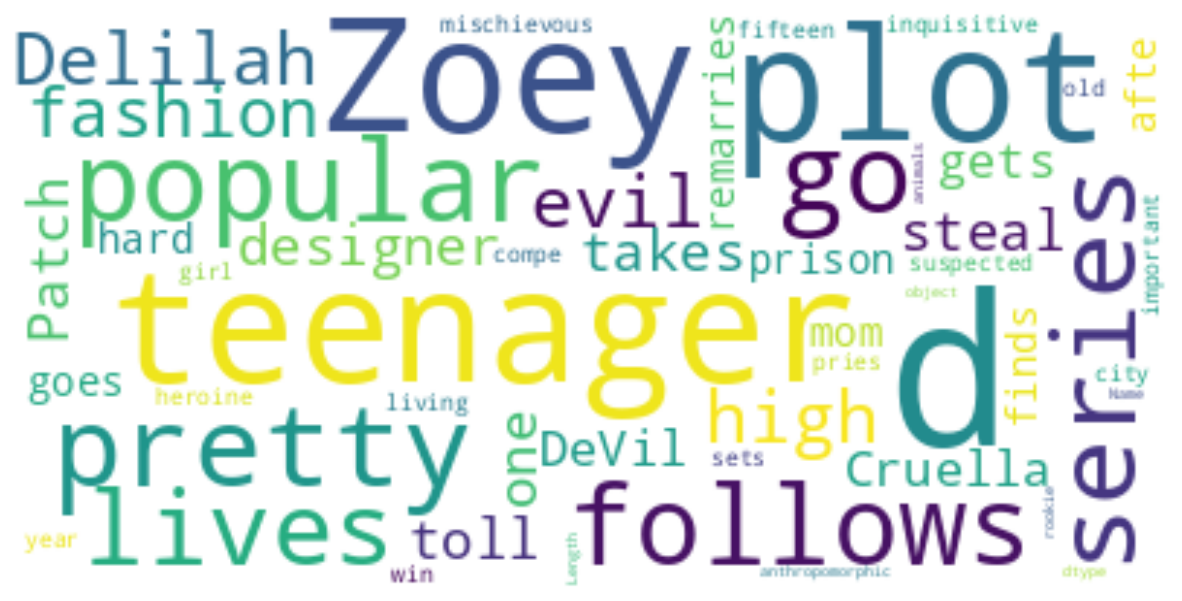

In [ ]:
stopwords = list(STOPWORDS)

genre = wordcloud.WordCloud(max_words=6000,stopwords=stopwords,background_color='white')

genre.generate(str(df['plot']))

plt.figure(figsize=(15,15))
plt.imshow(genre,interpolation='bilinear')
plt.axis('off')
plt.show()

Top 5 Writer

In [ ]:
df_writer = df.assign(var1 = df.writer.str.split(',')).explode('var1').reset_index(drop = True)

df_writer['splitted'] = df_writer.var1.str.lstrip()
writers = pd.DataFrame(df_writer['splitted'].value_counts()).reset_index().head(5)

fig = px.bar(writers,writers['index'],writers['splitted'],labels={'index':'name','splitted':'count'})
fig.update_layout(title='Top 5 Writers',title_x=0.5)

Top 5 Director

In [ ]:
df_director = df.assign(var1 = df.director.str.split(',')).explode('var1').reset_index(drop = True)

df_director['splitted'] = df_director.var1.str.lstrip()

directors = pd.DataFrame(df_director['splitted'].value_counts()).reset_index().head(5)

fig = px.bar(directors,directors['index'],directors['splitted'],labels={'index':'name','splitted':'count'})
fig.update_layout(title='Top 5 Directors',title_x=0.5)

Distribution of Year



In [ ]:
fig = px.histogram(df['year'],labels={'value':'year'})
fig.update_layout(title='Distribution of show years',title_x=0.5)

Top 5 years with the highest Cumulative IMDB ratings

In [ ]:
df_years = df.groupby('year')[['imdb_rating']].sum().reset_index().sort_values('imdb_rating',ascending=False)
fig = px.pie(df_years.head(5),names=df_years['year'].head(5),values=df_years['imdb_rating'].head(5),labels=df_years['year'],hole=0.5)
fig.update_traces(textposition='inside',name='year+label')

fig.update_layout(title='Top 5 years with the highest Cumulative IMDB ratings',title_x=0.5)

Box Plot of Runtimes

In [ ]:
fig = px.box(df,y='runtime')
fig.update_layout(title='Box Plot of Runtimes',title_x=0.5)

Box Plot of Metascore Ratings

In [ ]:
fig = px.box(df,y='metascore')
fig.update_layout(title='Box Plot of Metascore Ratings',title_x=0.5)

Top 5 Languages

In [ ]:
df_lang = df.assign(var1 = df.language.str.split(',')).explode('var1').reset_index(drop = True)

df_lang['splitted'] = df_lang.var1.str.lstrip()

lang = pd.DataFrame(df_lang['splitted'].value_counts()).reset_index().head(10)
lang.drop(df.index[5], inplace=True)

fig = px.bar(lang,lang['index'],lang['splitted'])
fig.update_layout(title='Top 10 Languages',title_x=0.5)

Pair Plot

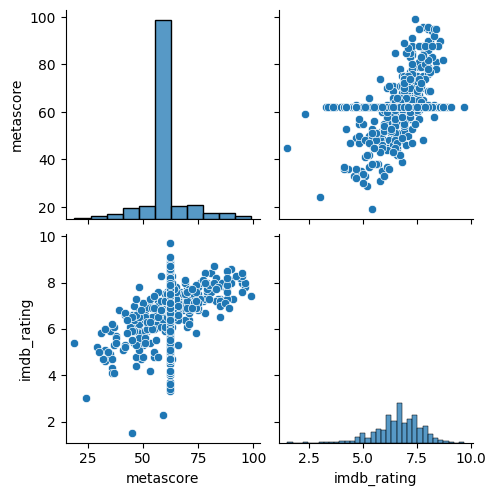

In [ ]:
sns.pairplot(df, vars=['metascore', 'imdb_rating'])
plt.show()


Number of Metascore Rating by Genre

In [ ]:
fig = px.pie(df['metascore'],values=df['metascore'],names=df['genre'])
fig.update_traces(textposition='inside')
fig.update_layout(title='Number of Metascore Ratings by Genre',title_x=0.5)
fig.show()

Sum of IMDB Ratings per show types

In [ ]:
fig = px.pie(df,names=df['type'],values=df['imdb_rating'],labels=df['type'],hole=0.5)
fig.update_layout(title='Sum of IMDB Ratings per show types',title_x=0.5)

Sum of IMDB Ratings grouped by Age Ratings

In [ ]:
fig = px.treemap(df, path=['rated'], values=df['imdb_rating'], height=700,
                 title='Sum of IMDB Ratings grouped by Age Ratings', color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.update_layout(title_x=0.5)
fig.show()

**Content Based Recommender System Based on Movie Different Metrics**

In [ ]:
df1 =  pd.read_csv("/content/cleaned_dataset_disney.csv")
features=['genre','actors','plot','title']
filters = df1[features]

In [ ]:
print(filters)

                                                 genre  \
0                               Comedy, Drama, Romance   
1                            Animation, Comedy, Family   
2                     Adventure, Comedy, Crime, Family   
3        Animation, Adventure, Comedy, Family, Musical   
4                            Adventure, Comedy, Family   
..                                                 ...   
913                            Comedy, Family, Fantasy   
914                  Adventure, Comedy, Family, Sci-Fi   
915                  Comedy, Family, Adventure, Sci-Fi   
916                  Adventure, Comedy, Family, Sci-Fi   
917  Animation, Adventure, Comedy, Crime, Family, M...   

                                                actors  \
0    Heath Ledger, Julia Stiles, Joseph Gordon-Levi...   
1    Josh Brener, Michaela Dietz, Bert Davis, Abiga...   
2    Glenn Close, Jeff Daniels, Joely Richardson, J...   
3    Barry Bostwick, Jason Alexander, Martin Short,...   
4    Glenn Cl

In [ ]:
#Cleaning the Data by Making all the Words in Lower Case.
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [ ]:
for feature in features:
    filters[feature] = filters[feature].apply(clean_data)
    
filters.head()

,genre,actors,plot,title
0,"comedy,drama,romance","heathledger,juliastiles,josephgordon-levitt,la...","apretty,popularteenagercan'tgooutonadateuntilh...",10thingsihateaboutyou
1,"animation,comedy,family","joshbrener,michaeladietz,bertdavis,abigailzoel...","thisseriesfollowsthelivesofdelilahanddoug,desc...",101dalmatianstreet
2,"adventure,comedy,crime,family","glennclose,jeffdaniels,joelyrichardson,joanplo...",anevilhigh-fashiondesignerplotstostealdalmatia...,101dalmatians
3,"animation,adventure,comedy,family,musical","barrybostwick,jasonalexander,martinshort,bobby...","beingoneof101takesitstollonpatch,whodoesn'tfee...",101dalmatians2:patch'slondonadventure
4,"adventure,comedy,family","glennclose,gérarddepardieu,ioangruffudd,alicee...",cruelladevilgetsoutofprisonandgoesafterthepupp...,102dalmatians


In [ ]:
# Creating our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer.
def create_soup(x):
    return x['actors'] + ' ' +x['genre']+' '+ x['plot']

In [ ]:
filters['soup'] = filters.apply(create_soup, axis=1)

In [ ]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filters['soup'])

In [ ]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
filters.sort_values(by='genre').head(10)


,genre,actors,plot,title,soup
192,"action,adventure,biography,drama,family","pintocolvig,waltdisney,chethuntley,dickvandyke",walttakesviewersonyetanothertourofdisneylandto...,disneylandaroundtheseasons,"pintocolvig,waltdisney,chethuntley,dickvandyke..."
381,"action,adventure,comedy","sadiestanley,seangiambrone,ciararileywilson,to...",heroeskimandronfacetheproblemsofstartinghighsc...,kimpossible,"sadiestanley,seangiambrone,ciararileywilson,to..."
125,"action,adventure,comedy,crime,family","emilyosment,davidhenrie,jasonearles,jonathankeltz","melissahasabadcaseofsiblingrivalry,onlyhercomp...",dadnapped,"emilyosment,davidhenrie,jasonearles,jonathanke..."
314,"action,adventure,comedy,crime,family,romance,s...","deanjones,donknotts,juliesommars,jacquesmarin","herbie,thevolkswagenbeetlewithamindofitsown,is...",herbiegoestomontecarlo,"deanjones,donknotts,juliesommars,jacquesmarin ..."
351,"action,adventure,comedy,crime,family,sci-fi","matthewbroderick,ruperteverett,joelyfisher,mic...",asecurityguard'sdreamscometruewhenheisselected...,inspectorgadget,"matthewbroderick,ruperteverett,joelyfisher,mic..."
546,"action,adventure,comedy,drama,family,fantasy","brycedallashoward,robertredford,oakesfegley,oo...",theadventuresofanorphanedboynamedpeteandhisbes...,pete'sdragon,"brycedallashoward,robertredford,oakesfegley,oo..."
534,"action,adventure,comedy,drama,family,war","dannyglover,rayliotta,denisleary,douge.doug","tokeeptheloyaltyofavillageduringthevietnamwar,...",operationdumbodrop,"dannyglover,rayliotta,denisleary,douge.doug ac..."
818,"action,adventure,comedy,family","dylansprouse,colesprouse,brendasong,debbyryan","spin-offofthehitdisneychannelseries""thesuiteli...",thesuitelifeondeck,"dylansprouse,colesprouse,brendasong,debbyryan ..."
154,"action,adventure,comedy,family,fantasy,sci-fi","oliviaholt,kerrisdorsey,brendanmeyer,katherine...",ateengirlgoesonamissiontorecaptureadangerousmo...,girlvs.monster,"oliviaholt,kerrisdorsey,brendanmeyer,katherine..."
279,"action,adventure,comedy,family,fantasy,sci-fi","billnighy,willarnett,zachgalifianakis,kelligarner",aspeciallytrainedsquadofguineapigsisdispatched...,g-force,"billnighy,willarnett,zachgalifianakis,kelligar..."


In [ ]:
# Reset index of our main Dataframe and construct reverse mapping as before
filters=filters.reset_index()
indices = pd.Series(filters.index, index=filters['title'])

In [ ]:
def get_recommendations_new(title, cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

**Testing the Recommendation System**

In [ ]:
get_recommendations_new('Coco', cosine_sim2)

267                                  Fantasia
664                            Saludos Amigos
709                          Star Wars Rebels
195                            The Lion Guard
962                   Who Framed Roger Rabbit
80     The Brave Little Toaster to the Rescue
917    Tinker Bell and the Great Fairy Rescue
918         Tinker Bell and the Lost Treasure
737                                  TaleSpin
862                   The Rescuers Down Under
Name: title, dtype: object

**Evaluation**

For content-based Recommender it is difficult to measure accuracy, and precision because here user rating is not available in our dataset.

Content-Based Filtering: Content-based filtering is used to recommend movies based on their metadata such as genre, actors, and plot. The code constructs a "metadata soup" by combining the relevant metadata features for each movie. It then applies a CountVectorizer to convert the text data into a numerical representation. Cosine similarity is computed on the count matrix to measure the similarity between movies based on their metadata.

Cosine Similarity: Cosine similarity is a metric used to determine the similarity between two vectors. In the code, cosine_similarity from sklearn.metrics.pairwise is used to calculate the cosine similarity matrix. It measures the similarity between each pair of movies based on their metadata representations (count matrix).

## Using ML Algorithms 

Decision Tree

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
import graphviz

# Load the dataset
df = pd.read_csv("/content/cleaned_dataset_disney.csv")

# Select relevant features for recommendation
features = ['plot', 'genre', 'actors', 'director']

# Drop rows with missing values in selected features
df = df.dropna(subset=features)

# Combine the features into a single column
df['combined_features'] = df[features].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Create the count matrix
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['combined_features'])

# Apply label encoding to convert genre labels to numerical values
label_encoder = LabelEncoder()
df['genre_encoded'] = label_encoder.fit_transform(df['genre'])

# Create the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Train the decision tree model
decision_tree.fit(count_matrix, df['genre_encoded'])

# Visualize the decision tree
dot_data = export_graphviz(decision_tree, out_file=None, feature_names=count.get_feature_names_out(), class_names=label_encoder.classes_, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("decision_tree", format="png", view=True, cleanup=True, quiet=False, quiet_view=False)

# Function to recommend movies using the decision tree model
def recommend_movies(title, decision_tree, count_vectorizer, label_encoder, top_n=10):
    # Transform the input title into a count matrix
    title_count = count_vectorizer.transform([title])

    # Predict the genre of the input title using the decision tree model
    predicted_genre = decision_tree.predict(title_count)[0]

    # Get the indices of movies with the predicted genre
    genre_indices = df[df['genre_encoded'] == predicted_genre].index

    # Exclude the input title from the recommended movies
    genre_indices = genre_indices[genre_indices != title_idx]

    # Calculate the similarity scores between the input title and recommended movies
    similarity_scores = cosine_similarity(title_count, count_matrix[genre_indices])

    # Sort the movies based on similarity scores
    sorted_indices = similarity_scores.argsort()[0][::-1]

    # Get the top N most similar movies
    top_movies = df.iloc[genre_indices[sorted_indices[:top_n]]]['title']

    return top_movies

# Input movie title for recommendation
input_title = 'Coco'

# Get the index of the input title in the dataset
title_idx = df[df['title'] == input_title].index[0]

# Recommend movies based on the input title using the decision tree model
recommended_movies = recommend_movies(input_title, decision_tree, count, label_encoder)

# Print the recommended movies
print(recommended_movies)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.470729 to fit


834                   The Little Mermaid Live!
519    Disney's Newsies: The Broadway Musical!
Name: title, dtype: object


decision_tree.png is the visual decision tree

Decision Tree Evaluation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv("/content/cleaned_dataset_disney.csv")

# Select relevant features for recommendation
features = ['plot', 'genre', 'actors', 'director']

# Drop rows with missing values in selected features
df = df.dropna(subset=features)

# Combine the features into a single column
df['combined_features'] = df[features].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Create the count matrix
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['combined_features'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(count_matrix, df['genre'], test_size=0.2, random_state=42)

# Create the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Train the decision tree model
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)









Accuracy: 0.5163043478260869
Precision: 0.4417270531400966
Recall: 0.5163043478260869
F1 Score: 0.46408552672854736


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Bagging Algorithm with Evaluation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv("/content/cleaned_dataset_disney.csv")

# Select relevant features for recommendation
features = ['plot', 'genre', 'actors', 'director']

# Drop rows with missing values in selected features
df = df.dropna(subset=features)

# Combine the features into a single column
df['combined_features'] = df[features].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Create the count matrix
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['combined_features'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(count_matrix, df['genre'], test_size=0.2, random_state=42)

# Create the base decision tree classifier
base_classifier = DecisionTreeClassifier()

# Create the Bagging classifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Train the Bagging classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5054347826086957
Precision: 0.38870341614906834
Recall: 0.5054347826086957
F1 Score: 0.4256391052897985


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Collaborative Filtering

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate

# Load the dataset into a pandas DataFrame
data = pd.read_csv('/content/cleaned_dataset_disney.csv')

# Define the reader object to parse the ratings
reader = Reader(rating_scale=(1, 10))

# Load the dataset from the pandas DataFrame
dataset = Dataset.load_from_df(data[['title', 'metascore', 'imdb_rating']], reader)

# Define the collaborative filtering algorithm (KNNBasic)
algo = KNNBasic()

# Evaluate the algorithm using cross-validation
cross_validate(algo, dataset, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Train the algorithm on the full dataset
trainset = dataset.build_full_trainset()
algo.fit(trainset)

# Make predictions for a specific user (user_id) and retrieve top-k recommendations
user_id = 'your_user_id'
k = 10
predictions = []
for movie_id in data['imdb_id'].unique():
    pred = algo.predict(user_id, movie_id)
    predictions.append((movie_id, pred.est))
    
# Sort the predictions by estimated rating (in descending order)
predictions.sort(key=lambda x: x[1], reverse=True)

# Retrieve the top-k recommended movies
top_k_recommendations = [movie_id for movie_id, _ in predictions[:k]]

# Print the top-k recommended movies
print(f"Top-{k} recommended movies for user {user_id}:")
for movie_id in top_k_recommendations:
    movie_title = data[data['imdb_id'] == movie_id]['title'].iloc[0]
    print(f"- {movie_title}")

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9541  0.9407  1.1053  0.9415  1.0867  1.0057  0.0741  
MAE (testset)     0.7399  0.7656  0.8174  0.7493  0.8356  0.7815  0.0380  
Fit time          0.01    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Computing the msd similarity matrix...
Done computing similarity matrix.
Top-10 recommended movies for user your_user_id:
- 10 Things I Hate About You
- 101 Dalmatian Street
- 101 Dalmatians
- 101 Dalm